In [5]:
# Markov Decision Process (MDP) Simulation and Value Iteration
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

# ---------------------------------------

In [6]:
# 1. Define the MDP environment
# -------------------------------------------------------------
# We'll use a simple Grid World (4x4) as an example.

class GridWorldMDP:
    def __init__(self, grid_size=(4,4), terminal_states=[0, 15], gamma=0.9):
        self.grid_size = grid_size
        self.num_states = grid_size[0] * grid_size[1]
        self.actions = ['U', 'D', 'L', 'R']
        self.gamma = gamma
        self.terminal_states = terminal_states

    def state_to_pos(self, s):
        return (s // self.grid_size[1], s % self.grid_size[1])

    def pos_to_state(self, pos):
        return pos[0]*self.grid_size[1] + pos[1]

    def step(self, s, a):
        if s in self.terminal_states:
            return s, 0

        i, j = self.state_to_pos(s)
        if a == 'U':
            i = max(i-1, 0)
        elif a == 'D':
            i = min(i+1, self.grid_size[0]-1)
        elif a == 'L':
            j = max(j-1, 0)
        elif a == 'R':
            j = min(j+1, self.grid_size[1]-1)

        next_state = self.pos_to_state((i, j))
        reward = -1  # penalty for each move
        return next_state, reward

    def get_transition_probabilities(self):
        # P[s][a] = list of (prob, next_state, reward)
        P = {}
        for s in range(self.num_states):
            P[s] = {}
            for a in self.actions:
                next_state, reward = self.step(s, a)
                P[s][a] = [(1.0, next_state, reward)]
        return P


In [7]:
# -------------------------------------------------------------
# 2. Initialize the MDP and transition model
# -------------------------------------------------------------
mdp = GridWorldMDP()
P = mdp.get_transition_probabilities()

print("Sample transitions for state 5:")
pprint(P[5])

# -------------------------------------------------------------
# 3. Value Iteration Algorithm
# -------------------------------------------------------------
def value_iteration(P, gamma=0.9, theta=1e-6):
    V = np.zeros(len(P))
    policy = np.zeros(len(P), dtype=str)

    while True:
        delta = 0
        for s in range(len(P)):
            if s in mdp.terminal_states:
                continue
            action_values = []
            for a in mdp.actions:
                v = 0
                for prob, next_state, reward in P[s][a]:
                    v += prob * (reward + gamma * V[next_state])
                action_values.append(v)
            max_v = max(action_values)
            delta = max(delta, abs(max_v - V[s]))
            V[s] = max_v
        if delta < theta:
            break

    # Derive optimal policy
    for s in range(len(P)):
        if s in mdp.terminal_states:
            policy[s] = '-'
            continue
        action_values = []
        for a in mdp.actions:
            v = 0
            for prob, next_state, reward in P[s][a]:
                v += prob * (reward + gamma * V[next_state])
            action_values.append(v)
        best_a = mdp.actions[np.argmax(action_values)]
        policy[s] = best_a

    return V, policy


Sample transitions for state 5:
{'D': [(1.0, 9, -1)],
 'L': [(1.0, 4, -1)],
 'R': [(1.0, 6, -1)],
 'U': [(1.0, 1, -1)]}


In [8]:
# -------------------------------------------------------------
# 4. Run Value Iteration
# -------------------------------------------------------------
V, policy = value_iteration(P, gamma=0.9)

print("\nOptimal Value Function:")
print(V.reshape(mdp.grid_size))
print("\nOptimal Policy:")
print(policy.reshape(mdp.grid_size))


Optimal Value Function:
[[ 0.   -1.   -1.9  -2.71]
 [-1.   -1.9  -2.71 -1.9 ]
 [-1.9  -2.71 -1.9  -1.  ]
 [-2.71 -1.9  -1.    0.  ]]

Optimal Policy:
[['-' 'L' 'L' 'D']
 ['U' 'U' 'U' 'D']
 ['U' 'U' 'D' 'D']
 ['U' 'R' 'R' '-']]


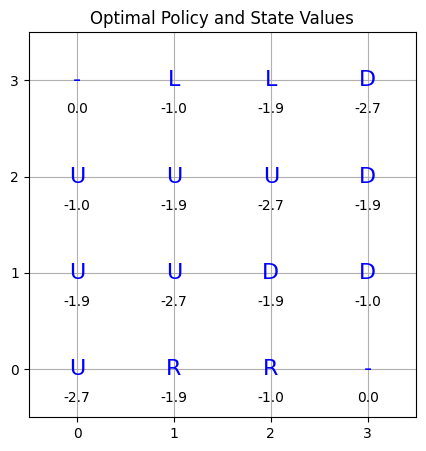

In [9]:
# -------------------------------------------------------------
# 5. Visualize Results
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5,5))
for i in range(mdp.grid_size[0]):
    for j in range(mdp.grid_size[1]):
        s = i*mdp.grid_size[1]+j
        ax.text(j, mdp.grid_size[0]-1-i, policy[s],
                ha='center', va='center', fontsize=16, color='blue')
        ax.text(j, mdp.grid_size[0]-1-i-0.3, f"{V[s]:.1f}",
                ha='center', va='center', fontsize=10, color='black')
ax.set_xticks(np.arange(mdp.grid_size[1]))
ax.set_yticks(np.arange(mdp.grid_size[0]))
ax.set_xlim(-0.5, mdp.grid_size[1]-0.5)
ax.set_ylim(-0.5, mdp.grid_size[0]-0.5)
ax.grid(True)
ax.set_title("Optimal Policy and State Values")
plt.show()


In [10]:
# -------------------------------------------------------------
# 6. MDP Simulation
# -------------------------------------------------------------
def simulate_mdp(mdp, policy, start_state=5, max_steps=10):
    state = start_state
    total_reward = 0
    print(f"\nStarting simulation from state {state}\n")
    for t in range(max_steps):
        if state in mdp.terminal_states:
            print(f"Reached terminal state {state} at step {t}.")
            break
        action = policy[state]
        next_state, reward = mdp.step(state, action)
        print(f"Step {t}: state={state}, action={action}, reward={reward}, next_state={next_state}")
        total_reward += reward
        state = next_state
    print(f"\nTotal Reward: {total_reward}")

simulate_mdp(mdp, policy)



Starting simulation from state 5

Step 0: state=5, action=U, reward=-1, next_state=1
Step 1: state=1, action=L, reward=-1, next_state=0
Reached terminal state 0 at step 2.

Total Reward: -2
